In [1]:
import sys, os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
data_dir = os.path.join(os.getcwd(), "V6")
import pcse
cropfile = os.path.join(data_dir, 'V6.crop')
from pcse.fileinput import CABOFileReader
cropdata = CABOFileReader(cropfile)
soilfile = os.path.join(data_dir, 'MO4.soil')
soildata = CABOFileReader(soilfile)
from pcse.util import WOFOST71SiteDataProvider
sitedata = WOFOST71SiteDataProvider(WAV=0.245, CO2=360)
from pcse.base import ParameterProvider
parameters = ParameterProvider(cropdata=cropdata, soildata=soildata, sitedata=sitedata)
from pcse.fileinput import YAMLAgroManagementReader
agromanagement_file = os.path.join(data_dir, 'V6_calendar.agro')
agromanagement = YAMLAgroManagementReader(agromanagement_file)
from pcse.fileinput import ExcelWeatherDataProvider
wdp = ExcelWeatherDataProvider("Climat_F4.xlsx")
from pcse.models import Wofost71_WLP_FD
wofsim = Wofost71_WLP_FD(parameters, wdp, agromanagement)
wofsim.run_till_terminate()
df_results = pd.DataFrame(wofsim.get_output())
df_results = df_results.set_index("day")
df_results.tail()

Platform not recognized, using system temp directory for PCSE settings.
Platform not recognized, using system temp directory for PCSE settings.
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pcse/fileinput/yaml_agro_loader.py:21: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  r = yaml.load(fp)


,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,WWLOW,EVW,EVS
day,,,,,,,,,,,,,
2004-05-23,2.0,0.0,7191.794491,3631.975559,1171.927467,2387.891466,445.157003,0.0,55.0,0.188082,17.994537,0.0,0.020191
2004-05-24,2.0,0.0,7191.794491,3631.975559,1171.927467,2387.891466,445.157003,0.0,55.0,0.187715,17.974346,0.0,0.026135
2004-05-25,2.0,0.0,7191.794491,3631.975559,1171.927467,2387.891466,445.157003,0.0,55.0,0.187240,17.948210,0.0,0.019208
2004-05-26,2.0,0.0,7191.794491,3631.975559,1171.927467,2387.891466,445.157003,0.0,55.0,0.188709,18.029003,0.0,0.124120
2004-05-27,2.0,0.0,7191.794491,3631.975559,1171.927467,2387.891466,445.157003,0.0,55.0,0.200089,18.654883,0.0,0.439120


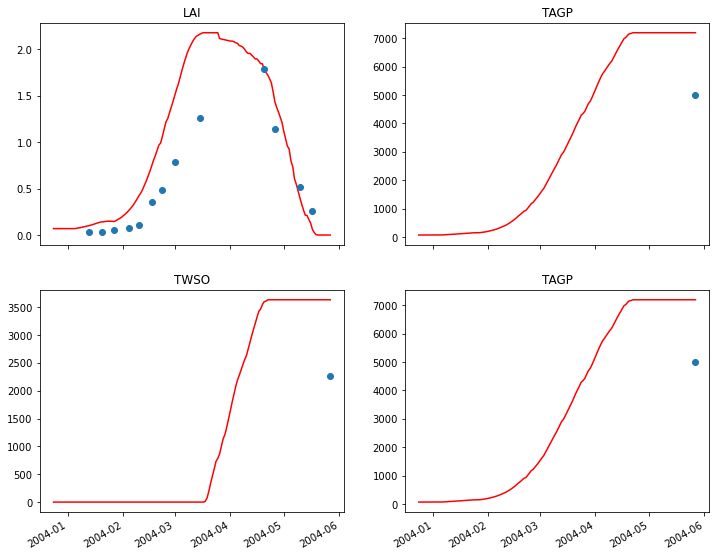

In [4]:
sortie_V4 = pd.read_excel('/Users/mac/Desktop/data/donn‚es_rendement_biomasse_CC_ET_climat/Canopy Cover CC1.xlsx' , sheet_name='V6') 
result = sortie_V4.set_index("day")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for var, ax in zip(["LAI", "TAGP", "TWSO", "TAGP"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'r-')
    ax.set_title(var)
for var, ax in zip(["LAI", "TAGP", "TWSO", "TAGP"], axes.flatten()):
    ax.plot_date(result.index, result[var])
    ax.set_title(var)
fig.autofmt_xdate()